In [1]:
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
Cat = pd.read_csv('d:\ГИГБРЕЙНС\AB тестирование\DZ9\cookie_cats.csv')

In [5]:
Cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
Cat.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [8]:
Cat.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [9]:
Cat.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [10]:
Cat.nlargest(5, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True


In [12]:
Cat = Cat[Cat.sum_gamerounds < 3000]
Cat.describe()

,userid,sum_gamerounds
count,9.018800e+04,90188.000000
mean,4.998397e+06,51.320253
std,2.883298e+06,102.682719
min,1.160000e+02,0.000000
25%,2.512211e+06,5.000000
50%,4.995804e+06,16.000000
75%,7.496461e+06,51.000000
max,9.999861e+06,2961.000000


In [13]:
A = Cat.version.groupby(Cat.version == 'gate_30').count()
B = Cat.version.groupby(Cat.version == 'gate_40').count()
print(A)
print(B)

version
False    45489
True     44699
Name: version, dtype: int64
version
False    44699
True     45489
Name: version, dtype: int64


In [16]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

In [17]:
mannwhitneyu(Cat[Cat.version == 'gate_30'].sum_gamerounds,
             Cat[Cat.version == 'gate_40'].sum_gamerounds)
     

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

если p-value близко к 0.05, это может означать, что есть некоторая статистическая значимость в результатах исследования, но требуется дальнейший анализ для подтверждения этого.

In [18]:
ttest_ind(Cat[Cat.version == 'gate_30'].sum_gamerounds,
          Cat[Cat.version == 'gate_40'].sum_gamerounds)

TtestResult(statistic=0.0633675766982082, pvalue=0.9494739458256001, df=90186.0)

In [19]:
print(kstest(Cat['sum_gamerounds'][Cat.version == 'gate_30'], 'norm'))
print(kstest(Cat['sum_gamerounds'][Cat.version == 'gate_40'], 'norm'))
     

KstestResult(statistic=0.8724153079945488, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.8707186187388001, pvalue=0.0, statistic_location=2, statistic_sign=-1)


Распеределение не нормальное.Если распределение не нормальное, то использование тестов, основанных на предположении о нормальном распределении данных, может быть неправильным

Text(0.5, 1.0, 'Количество игроков в игровых раундах за первую неделю')

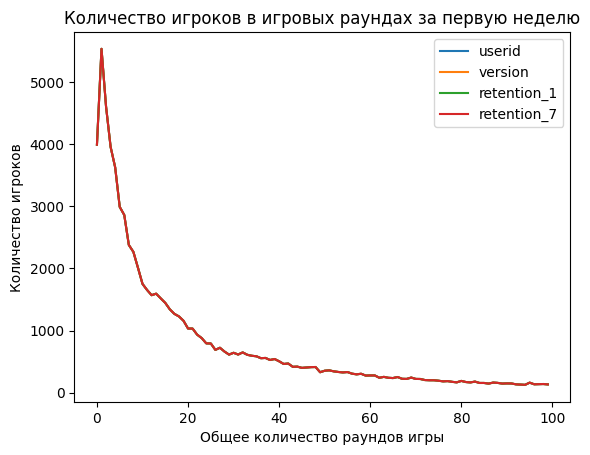

In [20]:
plot_Cat = Cat.groupby('sum_gamerounds').count()
ax = plot_Cat[:100].plot()
ax.set_xlabel('Общее количество раундов игры')
ax.set_ylabel('Количество игроков')
ax.set_title('Количество игроков в игровых раундах за первую неделю')
     

График показывает, что большинство пользователей играет менее 20 раундов

In [21]:
plt.style.use('ggplot')
Group_A = Cat[Cat.version == 'gate_30']
print(Group_A.head())
Group_B = Cat[Cat.version == 'gate_40']
print(Group_B.head())
bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A['sum_gamerounds'],
                                              bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B['sum_gamerounds'],
                                              bins=bins)).count())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3        False        False
1      337  gate_30              38         True        False
6     1066  gate_30               0        False        False
11    2101  gate_30               0        False        False
13    2179  gate_30              39         True        False
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
5     540  gate_40             187         True         True
7    1444  gate_40               2        False        False


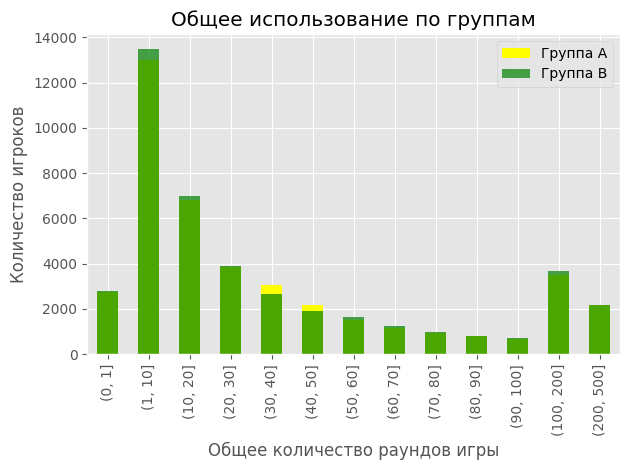

In [22]:
ax = plot_GA.plot(kind = 'bar', y='userid', color = 'yellow', alpha = 1,
                  title = 'Общее использование по группам')
plot_GB.plot(kind = 'bar', y = 'userid', ax = ax, color = 'green', alpha = 0.7)
ax.set_xlabel('Общее количество раундов игры')
ax.set_ylabel('Количество игроков')
plt.legend(['Группа A', 'Группа B'])
plt.tight_layout()
plt.grid(True)

Есть небольшие различия в пределах 30 - 40 сыгранных раундов

In [23]:
oneday = Cat.retention_1.sum()/Cat.retention_1.count()
print(str(oneday*100)+'%')

44.521444094558035%


In [24]:
oneday = Cat.retention_1.groupby(Cat.version).sum()/Cat.retention_1.groupby(Cat.version).count()
print(oneday*100)

version
gate_30    44.819795
gate_40    44.228275
Name: retention_1, dtype: float64


Обе версии имеют практически одинаковые результаты.Для принятия решения воспользуемся Bootstrapp для более детального иследования.

In [25]:
boot_1d = []
for i in range(500):
  boot_mean = Cat.retention_1.sample(frac=1, replace=True).groupby(Cat.version).mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)

version       gate_30   gate_40
retention_1  0.449068  0.440365
retention_1  0.450078  0.444244
retention_1  0.450612  0.441669
retention_1  0.446479  0.440729
retention_1  0.449090  0.444530
...               ...       ...
retention_1  0.444683  0.439689
retention_1  0.449831  0.440102
retention_1  0.450208  0.442278
retention_1  0.446308  0.443044
retention_1  0.447415  0.443545

[500 rows x 2 columns]


Text(0.5, 0, 'Среднее время удержания в течение 1 дня')

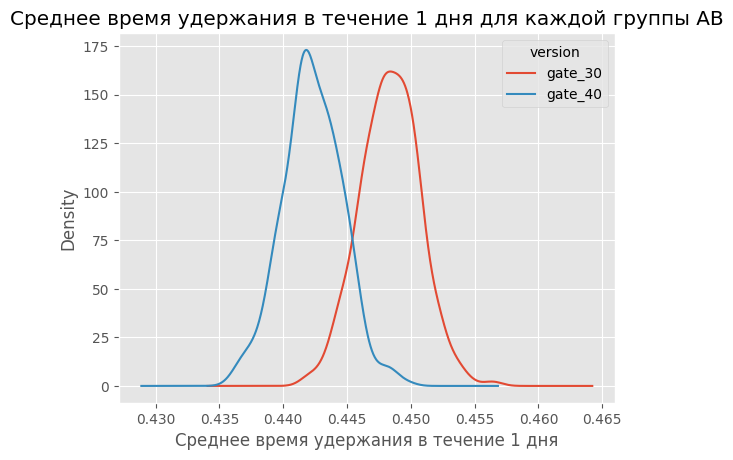

In [26]:
ax = boot_1d.plot.kde()
ax.set_title('Среднее время удержания в течение 1 дня для каждой группы AB')
ax.set_xlabel('Среднее время удержания в течение 1 дня')

Text(0.5, 1.0, 'Разница в % масштабирования')

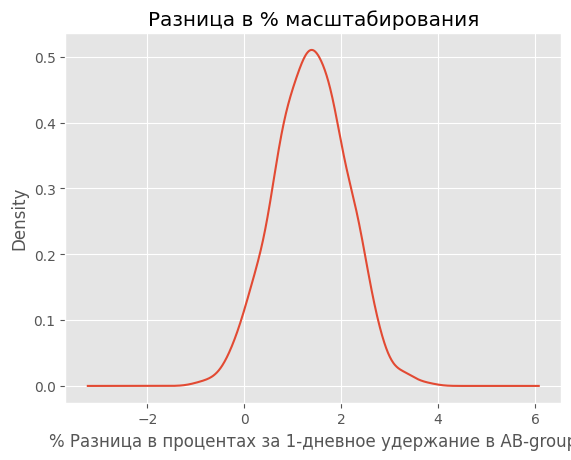

In [27]:
boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']*100
ax = boot_1d['difference'].plot.kde()
ax.set_xlabel('% Разница в процентах за 1-дневное удержание в AB-group')
ax.set_title('Разница в % масштабирования')

In [28]:
prob = (boot_1d['difference'] > 0).sum() / len(boot_1d['difference'])
print(str(prob*100)+'%')

96.8%


Высокая вероятность того, что удержание в течении 1 дня лучше, когда ворота находятся на уровне 30

In [29]:
Cat.groupby('version')['retention_7'].sum() / Cat.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

In [33]:
boot_7d = []
for i in range(500):
  boot_mean = Cat.retention_7.sample(frac=1, replace=True).groupby(Cat.version).mean()
  boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

version       gate_30   gate_40
retention_7  0.189561  0.182651
retention_7  0.193084  0.181617
retention_7  0.189225  0.181838
retention_7  0.192571  0.179847
retention_7  0.192464  0.180921


0.998


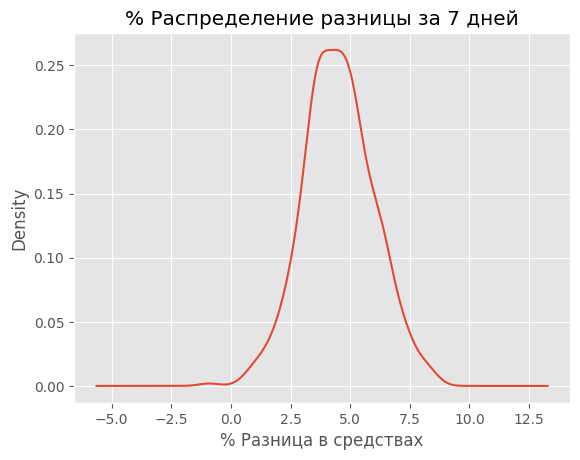

In [34]:
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel('% Разница в средствах')
ax.set_title('% Распределение разницы за 7 дней')
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(prob)
     

In [35]:
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(str(prob*100)+'%')

99.8%


ВЫВОД и РЕКОМЕНДАЦИЯ Исследование показало, что уровень удержания игроков в течение 7 дней выше, когда ворота находятся на уровне 30. Следовательно, для эффективного удержания аудитории не рекомендуется перемещать ворота с 30-го уровня на 40-й.